<a href="https://colab.research.google.com/github/CROOOME/Chaos-Game/blob/master/chaos_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rules
    Given a set of anchor points, 
    an initially randomly placed point
    will move toward a randomly selected anchor point
    based on a moving distance (mid-point) 

# 2D Chaos Game

anchors: [[2.91, 9.1], [15.42, 14.11], [14.64, 8.67]]
moving_point: [16.0, 10.66]


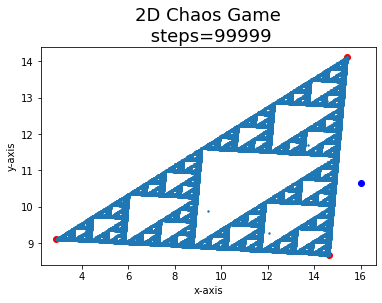

In [5]:
#!/usr/bin/env python

"""
    2D Chaos Game

"""

__author__ = "Marco Sandoval"
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Marco Sandoval"
__email__ = "marcosandoval68@gmail.com"
__status__ = "Production"

from matplotlib.widgets import Slider
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
import random

Point = namedtuple('Point', 'x y')


def mid_point(a, b, portion=2):
    c = [0, 0]
    c[0] = round((a[0] + b[0])/portion, 2)
    c[1] = round((a[1] + b[1])/portion, 2)
    return c


def calculate_next_position(anchor, old_position):
    return mid_point(anchor, old_position)


def build_visual(anchors, moving_point=None,):
    print('anchors:', anchors)
    print('moving_point:', moving_point)

    positions = []
    new_position = moving_point
    steps = 99999
    for i in range(steps):
        anchor = anchors[random.randrange(len(anchors))]
        new_position = calculate_next_position(anchor, new_position)
        positions.append(new_position)

    anchors = np.array(anchors)
    moving_point = np.array(moving_point)
    positions = np.array(positions)

    slider_size = (0, steps/10)

    plt.scatter(*anchors.T, color='r')
    plt.scatter(*moving_point.T, color='b')
    plt.scatter(*positions.T, s=2)
    plt.title('2D Chaos Game\n steps={}'.format(str(steps)), fontsize=18)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.show()



def random_point():
    # return Point(x=random.randrange(0, 20), y=random.randrange(0, 20))

    return [round(random.uniform(0, 20), 2), round(random.uniform(0, 20), 2)]


def generate_anchor_points(n=3):
    anchor_points = []

    for i in range(n):
        anchor_points.append(random_point())

    return anchor_points


def generate_starting_point():
    starting_point = random_point()
    return starting_point


if __name__ == "__main__":
    random.seed(100)
    num_anchor_points = 3
    anchor_points = generate_anchor_points(n=num_anchor_points)
    starting_position = generate_starting_point()
    build_visual(anchors=anchor_points, moving_point=starting_position)
